In [8]:
# !conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0 -y

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rahul gupta\.conda\envs\Yolo

  added / updated specs:
    - cudatoolkit=11.2
    - cudnn=8.1.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.2.2         |      h7d7167e_13       634.5 MB  conda-forge
    cudnn-8.1.0.77             |       h3e0f4f4_0       610.8 MB  conda-forge
    openssl-3.3.0              |       h2466b09_3         8.0 MB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_0         1.2 MB  conda-forge
    vc14_runtime-14.38.33135   |      h835141b_20         727 KB  conda-forge
    vs2015_runtime-14.38.33135 |      h22015db_20          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1.23 GB

The followi

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for device in gpus:
        print(f"Found a GPU with the name {device}")
else:
    print("No GPU found")

No GPU found


In [28]:
import gdown
url = 'https://drive.google.com/file/d/1MZCjyNt4YFMCVGOddElEL2MiqBwym9kT/view?usp=sharing' # This is the id of file in my URL : 1MZCjyNt4YFMCVGOddElEL2MiqBwym9kT
file_id = url.split('/')[-2]
os.chdir(r"C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data")
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
print('Data Downloaded')

!unzip footballplayersdetection_v9.zip
!rm -rf footballplayersdetection_v9.zip

SyntaxError: unterminated string literal (detected at line 4) (3909883673.py, line 4)

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.23  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete  (12 CPUs, 5.9 GB RAM, 175.1/275.7 GB disk)


In [11]:
# !pip install supervision

In [6]:
from ultralytics import YOLO
import supervision as sv

model = YOLO("yolov8n.pt")

In [ ]:
os.chdir("../")

In [7]:
!yolo train model=yolov8n.pt data="data/football-players-detection.v9i.yolov8/data.yaml" epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.2.25 available 😃 Update with 'pip install -U ultralytics'


train: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\train\labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
train: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\train\labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]

val: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\valid\labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]
val: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-D


Ultralytics YOLOv8.2.23 🚀 Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/rahul gupta/Documents/Learning/Projects/Yolo Object Detection and Tracking/Objection-Detection-and-Tracking-on-Football-Players/data/football-players-detection.v9i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnosti

In [11]:
!yolo detect val model="Trial Notebook\runs\detect\train\weights\best.pt" data="data/football-players-detection.v9i.yolov8/data.yaml"

Ultralytics YOLOv8.2.23 🚀 Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
                   all         43       1025      0.832      0.599      0.638      0.405
                  ball         43         39          1          0     0.0495    0.00991
            goalkeeper         43         32      0.783      0.781      0.842      0.545
                player         43        853      0.859      0.943      0.961      0.646
               referee         43        101      0.686       0.67        0.7      0.421
Speed: 2.9ms preprocess, 93.1ms inference, 0.0ms loss, 122.9ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\valid\labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]
val: Scanning C:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\valid\labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:08<00:16,  8.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:11<00:05,  5.07s/it]
            

In [24]:
!yolo predict model="Trial Notebook\runs\detect\train\weights\best.pt" source="data/football-players-detection.v9i.yolov8/test/images"

Ultralytics YOLOv8.2.23 🚀 Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/19 c:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\test\images\08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg: 384x640 19 players, 1 referee, 123.4ms
image 2/19 c:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\test\images\40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 81.9ms
image 3/19 c:\Users\rahul gupta\Documents\Learning\Projects\Yolo Object Detection and Tracking\Objection-Detection-and-Tracking-on-Football-Players\data\football-players-detection.v9i.yolov8\test\images\42ba34_1_5_png.rf.4337fde8fbe364

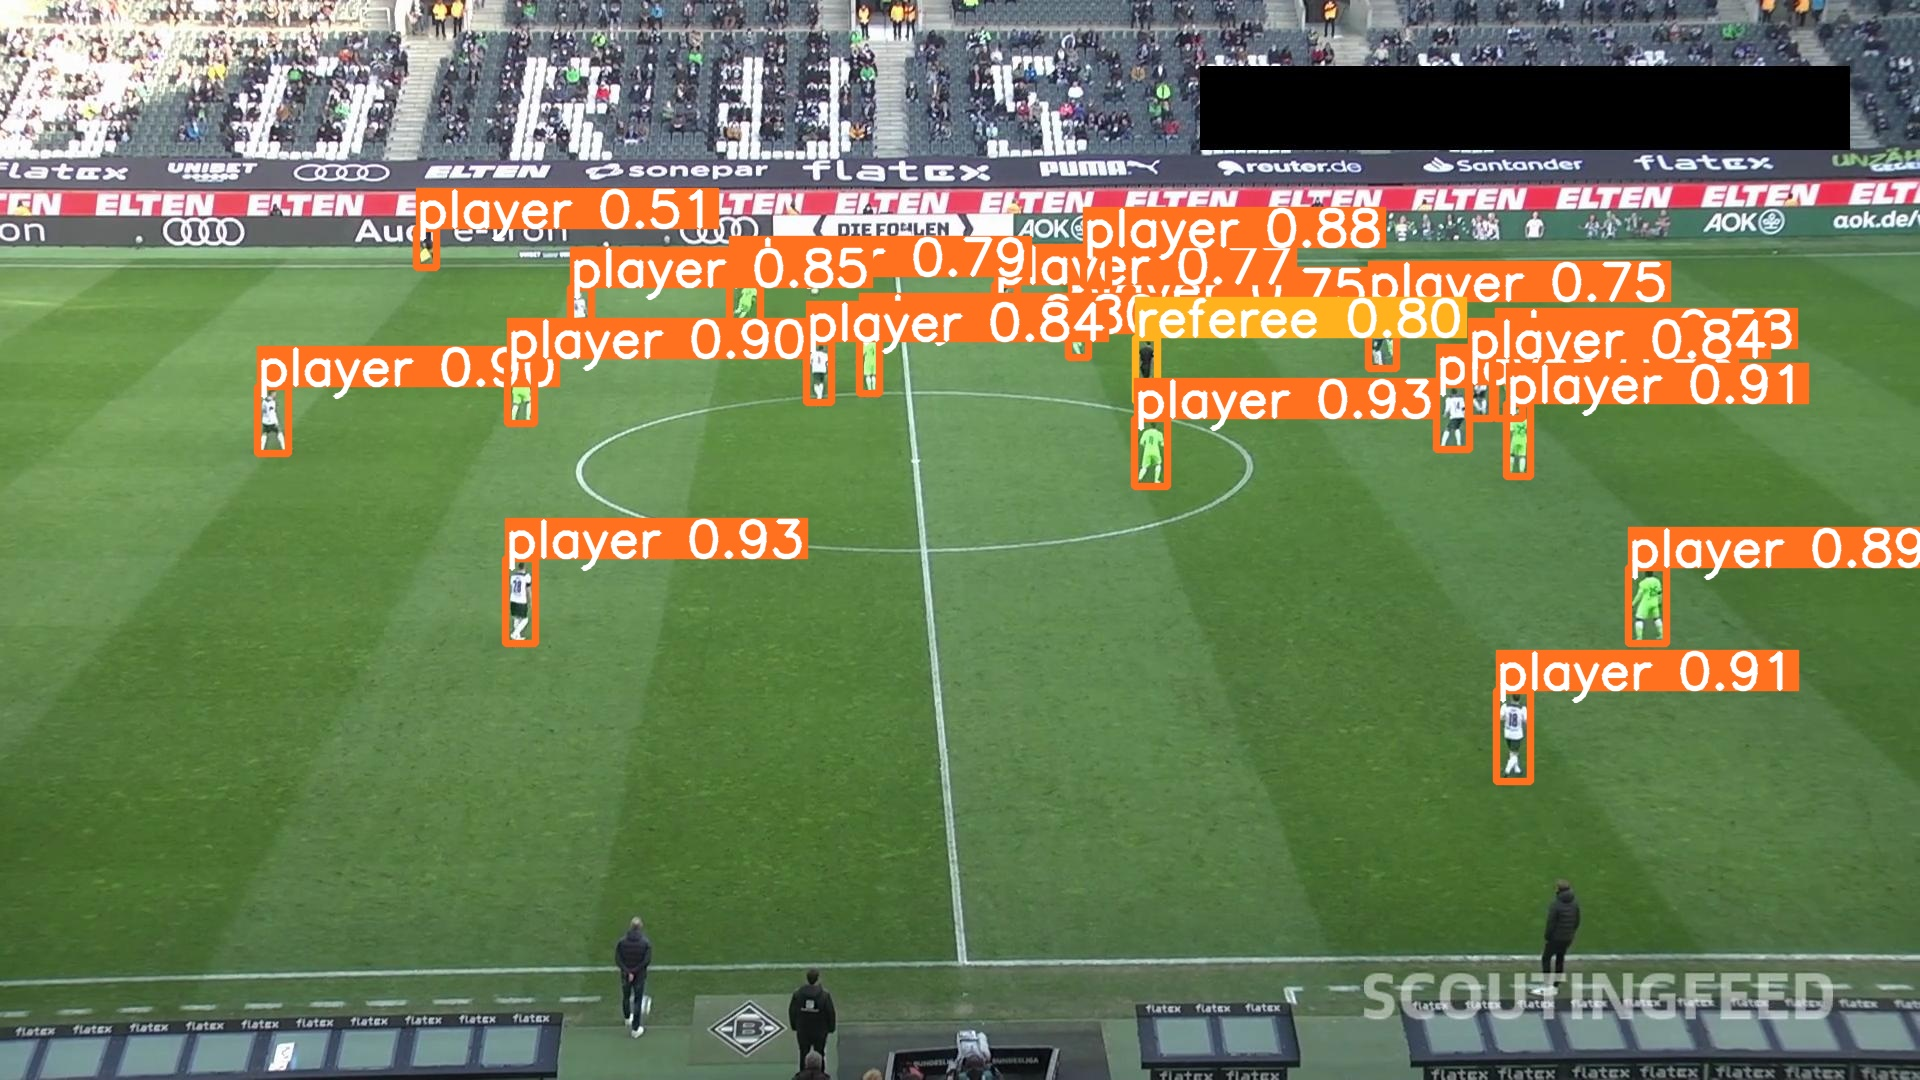

In [27]:
from IPython.display import Image
Image(r"Trial Notebook\runs\detect\predict\08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg")

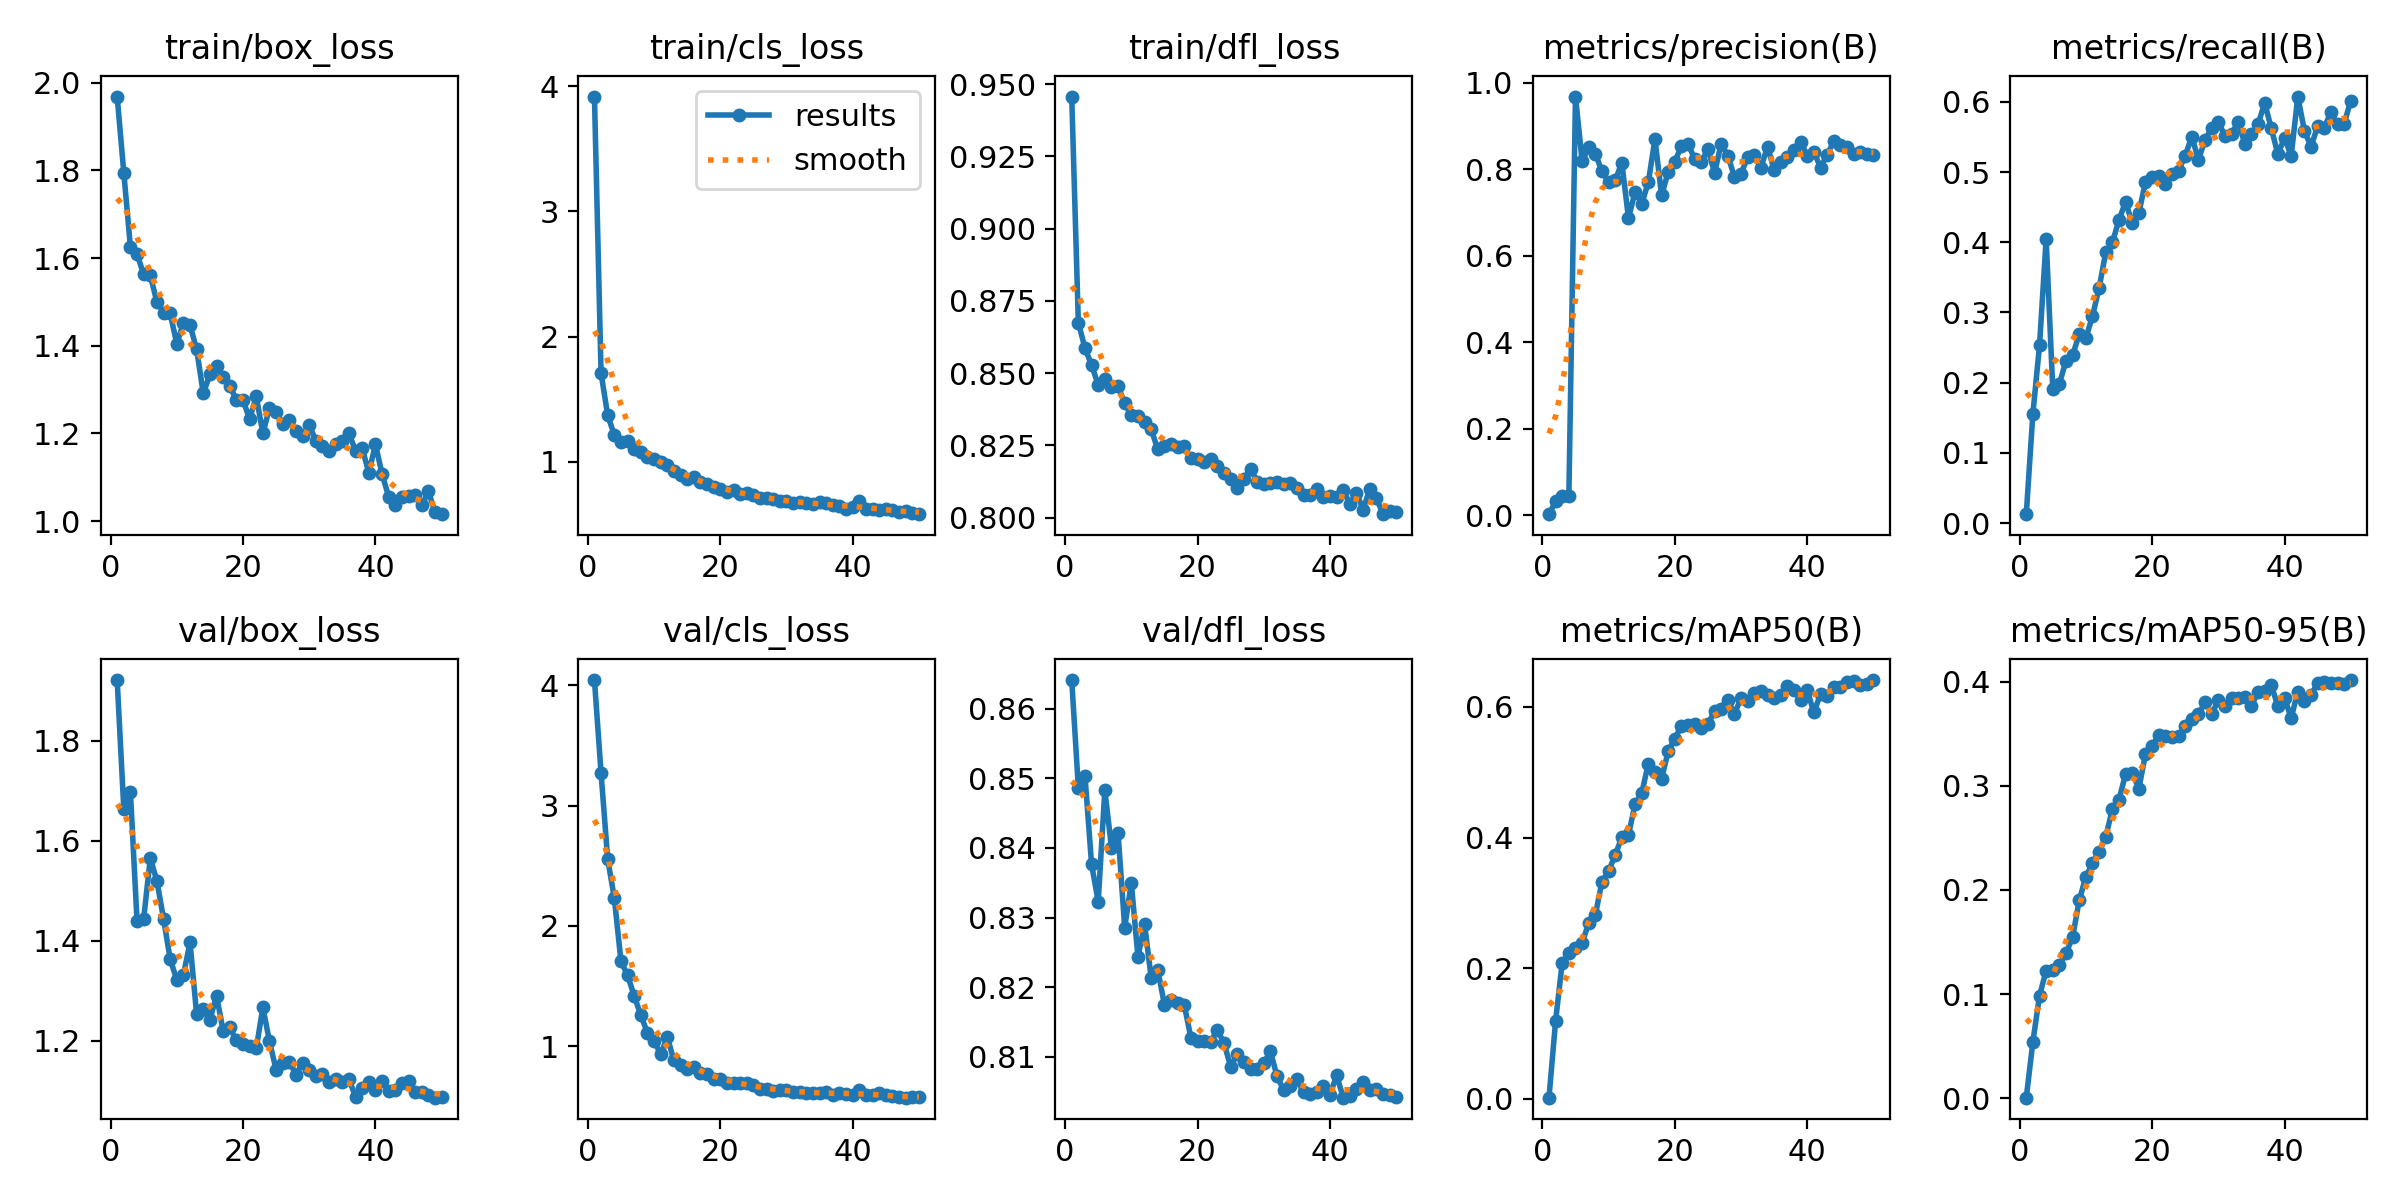

In [26]:
Image(r'Trial Notebook\runs\detect\train\results.png')


0: 384x640 20 players, 2 referees, 197.2ms
Speed: 24.4ms preprocess, 197.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


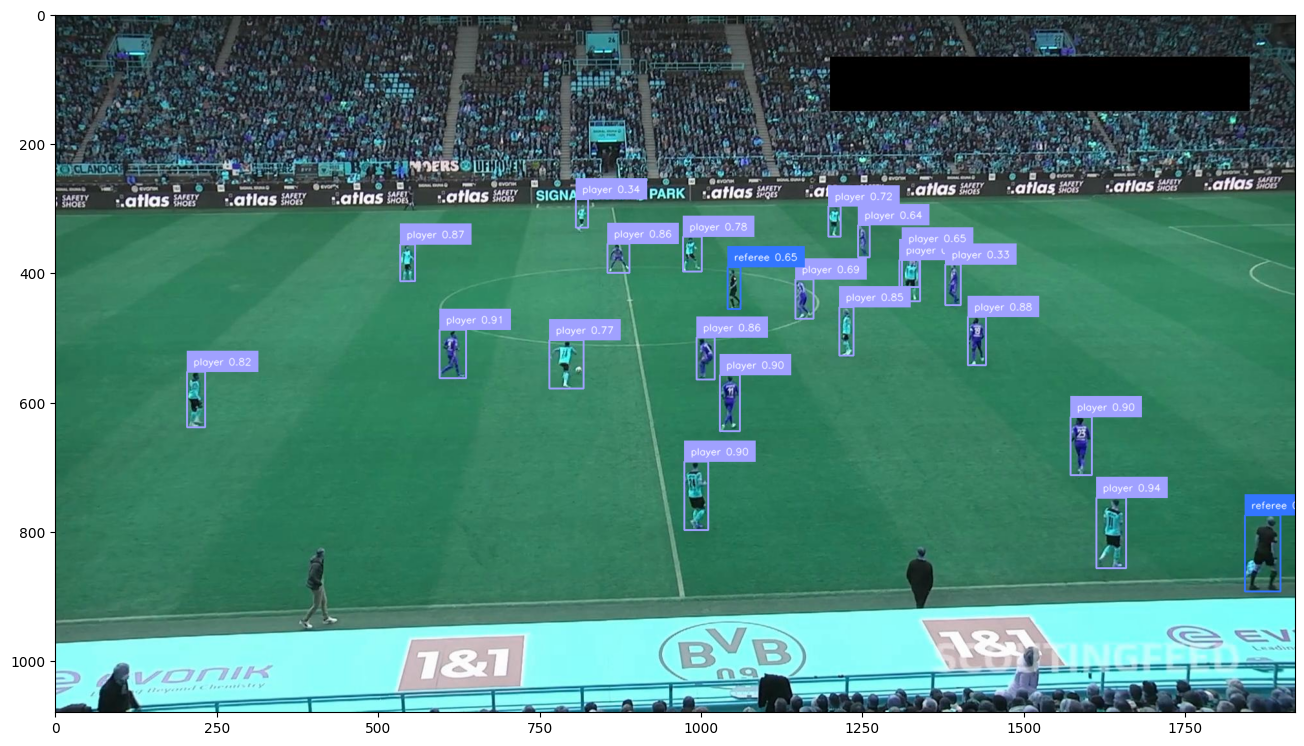

In [20]:
import cv2
import supervision as sv
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO(r"Trial Notebook\runs\detect\train\weights\best.pt")
image = cv2.imread("data/football-players-detection.v9i.yolov8/test/images/4b770a_1_6_png.rf.ce687822527c0c5c9c1c1661831dcdd5.jpg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(annotated_image)

In [ ]:
# import numpy as np
# import supervision as sv
# from ultralytics import YOLO

# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# tracker = sv.ByteTrack()
# box_annotator = sv.BoundingBoxAnnotator()

# def callback(frame: np.ndarray, _: int) -> np.ndarray:
#     results = model(frame)[0]
#     detections = sv.Detections.from_ultralytics(results)
#     detections = tracker.update_with_detections(detections)
#     return box_annotator.annotate(frame.copy(), detections=detections)

# sv.process_video(
#     source_path='/kaggle/input/football-player-dataset-for-yolov8-hosted/videoplayback.mp4',
#     target_path="result.mp4",
#     callback=callback
# )

In [ ]:
# import numpy as np
# import supervision as sv
# from ultralytics import YOLO

# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# tracker = sv.ByteTrack()
# box_annotator = sv.BoundingBoxAnnotator()
# label_annotator = sv.LabelAnnotator()
# trace_annotator = sv.TraceAnnotator()

# def callback(frame: np.ndarray, _: int) -> np.ndarray:
#     results = model(frame)[0]
#     detections = sv.Detections.from_ultralytics(results)
#     detections = tracker.update_with_detections(detections)

#     labels = [
#         f"{tracker_id} {results.names[class_id]}"
#         for class_id, tracker_id
#         in zip(detections.class_id, detections.tracker_id)
#     ]

#     annotated_frame = box_annotator.annotate(
#         frame.copy(), detections=detections)
#     annotated_frame = label_annotator.annotate(
#         annotated_frame, detections=detections, labels=labels)
#     return trace_annotator.annotate(
#         annotated_frame, detections=detections)

# sv.process_video(
#     source_path='/kaggle/input/football-player-dataset-for-yolov8-hosted/videoplayback.mp4',
#     target_path="result.mp4",
#     callback=callback
# )